In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import email
import datetime as dt
from pprint import pprint

# Enron Emails Data Cleaning
## Load the Data

The Enron Email Dataset was aquired on March 9, 2020 from [Kaggle](https://www.kaggle.com/wcukierski/enron-email-dataset).

In [6]:
file_path = "enron_cleaned.csv"
emails_df = pd.read_csv(file_path)

## Preview the Data

Lets take a look at the emails DataFrame.

In [4]:
emails_df.shape

(517401, 2)

In [5]:
emails_df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


Lets look at a sample from the `message` column.

In [7]:
print(emails_df['message'][1])

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

## Rename the `message` column

Since the real email messages are buried in the `message` column, lets rename the column to `data`.

In [8]:
emails_df.rename(columns={'message':'data'}, inplace=True)

## Parsing the Data

It appears to be that the `message` column contains all the desired information. This column must be parsed for the useful information. 

In [9]:
# Convert content in emails['data'] to email objects
email_objs = list(map(email.message_from_string, emails_df['data']))

### Extract Email Messages
Now that we have email objects, we may use get_payload() to extract the email message itself.

In [10]:
def create_messages_column(emails, df):
    """ Adds column `message` to df containing the email's content
    emails: email object
    df: DataFrame to add column to
    """
    msgs = []
    for email in emails:
        msg = email.get_payload()
        msg = msg.replace('\n',' ')
        msg = msg.replace('\t',' ')
        msgs.append(msg)
    df['message'] = msgs

In [11]:
create_messages_column(email_objs, emails_df)

In [11]:
emails_df.head()

,file,data,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,Here is our forecast
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Randy, Can you send me a schedule of the sal..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Let's shoot for Tuesday at 11:45.


### Extract All Other Email Fields

We can use the email objects' method key() to see what other fields exist.

In [12]:
pprint(email_objs[0].keys())

['Message-ID',
 'Date',
 'From',
 'To',
 'Subject',
 'Mime-Version',
 'Content-Type',
 'Content-Transfer-Encoding',
 'X-From',
 'X-To',
 'X-cc',
 'X-bcc',
 'X-Folder',
 'X-Origin',
 'X-FileName']


In [16]:
def parse_data(emails, df):
    """ Creates a new column in df for every key in emails
    emails: email object
    df: DataFrame to add column to
    """
    fields = emails[0].keys()
    for field in fields:
        field_series = []
        for email in emails:
            field_series.append(email[field])
        df[field] = field_series

In [17]:
parse_data(email_objs, emails_df)

In [18]:
emails_df.head(2)

,file,message,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName
0,allen-p/_sent_mail/1.,Here is our forecast,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst
1,allen-p/_sent_mail/10.,Traveling to have a business meeting takes the...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst


## Drop Unneeded Columns

We can now drop the `data` column.

In [20]:
emails_df.drop(columns='data', inplace=True)

## Save DataFrame to CSV file

In [17]:
out_path = "../data/enron_cleaned.csv"
emails_df.to_csv(out_path)

In [18]:
emails_df_new = pd.read_csv(out_path)

### Converting `Date` Column Strings to Datetime Objects

In [43]:
emails_df['Date'] = pd.to_datetime(emails_df['Date'], infer_datetime_format=True)

## Analyzing When  Emails Are Sent

### Let's look at when emails are sent during the week

In [167]:
def getDistinctDays(emails_df): 
    """ returns a list where each index corresponds 
    to the number of distinct Mondays, Tuesdays, etc...
    emails_df: the dataframe or subset in which to analyze
    """
    day_list = [0,0,0,0,0,0,0]
    distinct = []
    for d in emails_df["Date"]:
        if (d.date() in distinct):
            continue
        else:
            distinct.append(d.date())
            day_list[d.dayofweek] += 1
    return day_list

In [168]:
def mean_emails_perDay(address):
    """ plots the average number of emails sent by a given address
    on each day of the week. Returns list of average emails sent each day, 
    indexed 0-6.
    address: the 'from' email address whose emails will be analyzed. 
    """
    df = emails_df[(emails_df.From == address)]
    df_byDay = df.groupby(df['Date'].dt.dayofweek)['message'].count()
    dfDay_counts = getDistinctDays(df)
    mean_byDay = [divZero(i,j) for i, j in zip(df_byDay, dfDay_counts)]
    
#   plot
    plt.xticks(byDay.index, ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday','Sunday'], rotation = 45)
    plt.title("")
    plt.xlabel("Day of the Week", fontsize = 15)
    plt.ylabel("Emails Sent", fontsize = 15)
    plt.title("Average Number of Emails Sent Per Day" + '\n' + address, fontsize = 18)
    plt.plot(mean_byDay, color = 'Red')
    return mean_byDay

In [113]:
def divZero(x,y):
    """ allows division by 0 by returning 0 if the 
    divisor is 0.
    x: dividend.
    y: divisor.
    """
    if y == 0:
        return 0
    else :
        return x/y

In [21]:
## group by day of the week and divide by distinct days to get an average per day for the entire dataframe.
day_counts = getDistinctDays(emails_df)
byDay = emails_df.groupby(emails_df['Date'].dt.dayofweek)['message'].count()
distinct_days = emails_df["Date"].map(lambda t: t.date()).unique()
mean_byDay = [divZero(i,j) for i, j in zip(byDay, day_counts)] 

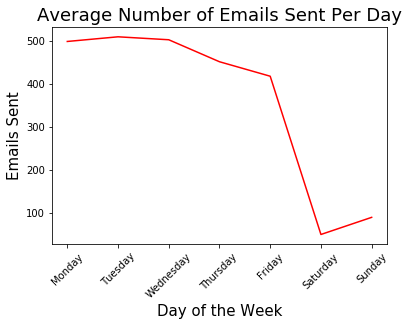

In [162]:
# plot graph
plt.xticks(byDay.index, ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday','Sunday'], rotation = 45)
plt.xlabel("Day of the Week", fontsize = 15)
plt.ylabel("Emails Sent", fontsize = 15)
plt.title("Average Number of Emails Sent Per Day", fontsize = 18)
plt.plot(mean_byDay, color = 'Red')

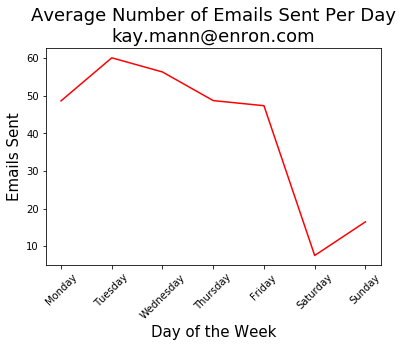

In [163]:
# find the average emails sent per day given a 'From' email address.
means = mean_emails_perDay('kay.mann@enron.com')

### Which people have sent and received the most emails?

In [153]:
emails_df.groupby(emails_df['From'])['message'].count().sort_values(ascending = False).head(10)

From
kay.mann@enron.com               16735
vince.kaminski@enron.com         14368
jeff.dasovich@enron.com          11411
pete.davis@enron.com              9149
chris.germany@enron.com           8801
sara.shackleton@enron.com         8777
enron.announcements@enron.com     8587
tana.jones@enron.com              8490
steven.kean@enron.com             6759
kate.symes@enron.com              5438
Name: message, dtype: int64

In [154]:
emails_df.groupby(emails_df['To'])['message'].count().sort_values(ascending = False).head(10)

To
pete.davis@enron.com         9155
tana.jones@enron.com         5677
sara.shackleton@enron.com    4974
vkaminski@aol.com            4870
jeff.dasovich@enron.com      4350
kate.symes@enron.com         3517
all.worldwide@enron.com      3324
mark.taylor@enron.com        3295
kay.mann@enron.com           3085
gerald.nemec@enron.com       3074
Name: message, dtype: int64

### Now let's look at when emails are sent during the day

In [112]:
def getDistinctHours(emails_df): 
    """ returns a list where each index corresponds 
    to the number of distinct hours in the day where 
    an email was sent.
    """
    h_list = [0] * 24
    distinct = []
    for d in emails_df["Date"]:
        for h in distinct:
            if (h.date() == d.date()):
                if (h.hour == d.hour):
                    break
        else:
            distinct.append(d)
            h_list[d.hour] += 1
    return h_list

In [164]:
def mean_emails_perHour(address):
    """ plots the average number of emails sent by a given address
    at each hour of the day.
    address: the 'from' email address whose emails will be analyzed. 
    """
    df = emails_df[(emails_df.From == address)]
    df_byHour = df.groupby(df['Date'].dt.hour)['message'].count()
    dfhour_counts = getDistinctHours(df)
    mean_byHour = [0]*24
#     if no emails have been sent at some hour then the count should be 0.
    for i in range(24):
        if dfhour_counts[i] == 0:
            continue
        else:
            mean_byHour[i] = divZero(df_byHour[i],dfhour_counts[i])    
#     plot
    plt.xticks(byHour.index, rotation = 60)
    plt.title("")
    plt.xlabel("Hour of Day" , fontsize = 15)
    plt.ylabel("Emails Sent", fontsize = 15)
    plt.title("Average Number of Emails Sent Every Hour" + '\n' + address, fontsize = 18)
    plt.plot(mean_byHour)
    return mean_byHour

In [115]:
# Running hourly analysis on a subset of the entire email_df dataframe
h_counts = getDistinctHours(emails_df.head(100000))
h_byDay = [0]*24
h_byDay = emails_df.head(100000).groupby(emails_df['Date'].dt.hour)['message'].count()
mean_byHour = [0]*24
for i in range(24):
    if h_counts[i] == 0:
        continue
    else:
        mean_byHour[i] = divZero(h_byDay[i],h_counts[i])

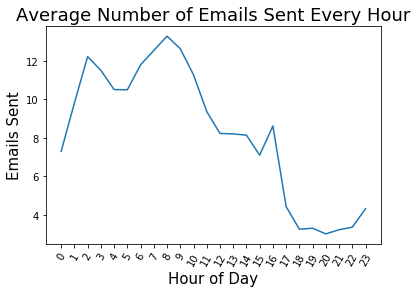

In [134]:
plt.xticks(byHour.index, rotation = 60)
plt.title("")
plt.xlabel("Hour of Day" , fontsize = 15)
plt.ylabel("Emails Sent", fontsize = 15)
plt.title("Average Number of Emails Sent Every Hour", fontsize = 18)
plt.plot(mean_byHour)

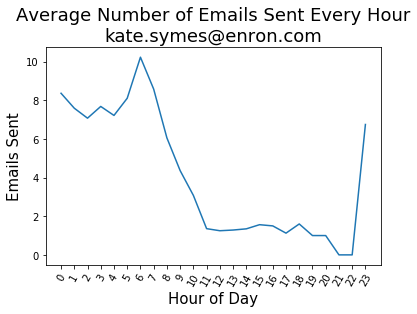

In [165]:
# find the average emails sent per hour given a 'From' email address.
hour_means = mean_emails_perHour('kate.symes@enron.com')

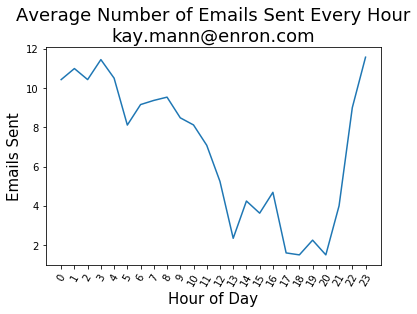

In [166]:
# find the average emails sent per hour given a 'From' email address.
hour_means = mean_emails_perHour('kay.mann@enron.com')

### Using the total number of emails instead of the average

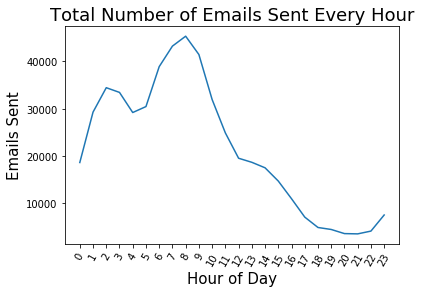

In [23]:
# grouping by hour of the day
byHour = emails_df.groupby(emails_df['Date'].dt.hour)['message'].count()
# plot graph
plt.xticks(byHour.index, rotation = 60)
plt.title("")
plt.xlabel("Hour of Day" , fontsize = 15)
plt.ylabel("Emails Sent", fontsize = 15)
plt.title("Total Number of Emails Sent Every Hour", fontsize = 18)
plt.plot(byHour)
# feels a little strange that most emails are sent before 12 PM according to the graph, so something seems off

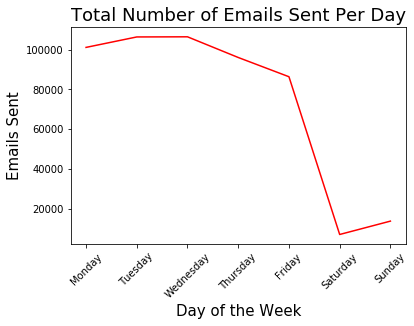

In [146]:
# plot graph
plt.xticks(total_days.index, ['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday','Sunday'], rotation = 45)
plt.xlabel("Day of the Week", fontsize = 15)
plt.ylabel("Emails Sent", fontsize = 15)
plt.title("Total Number of Emails Sent Per Day", fontsize = 18)
plt.plot(byDay, color = 'Red')

## Modeling Dataset as a Graph

In [21]:
import networkx as nx
emails_df

In [38]:
## not feasible to model entire dataset as a graph so only a sample of the dataset is used.
Gs = nx.Graph()
sample = emails_df.head(100).sample(frac=.8)
for row in sample.iterrows():
        Gs.add_edge(row[1][4],row[1][5])

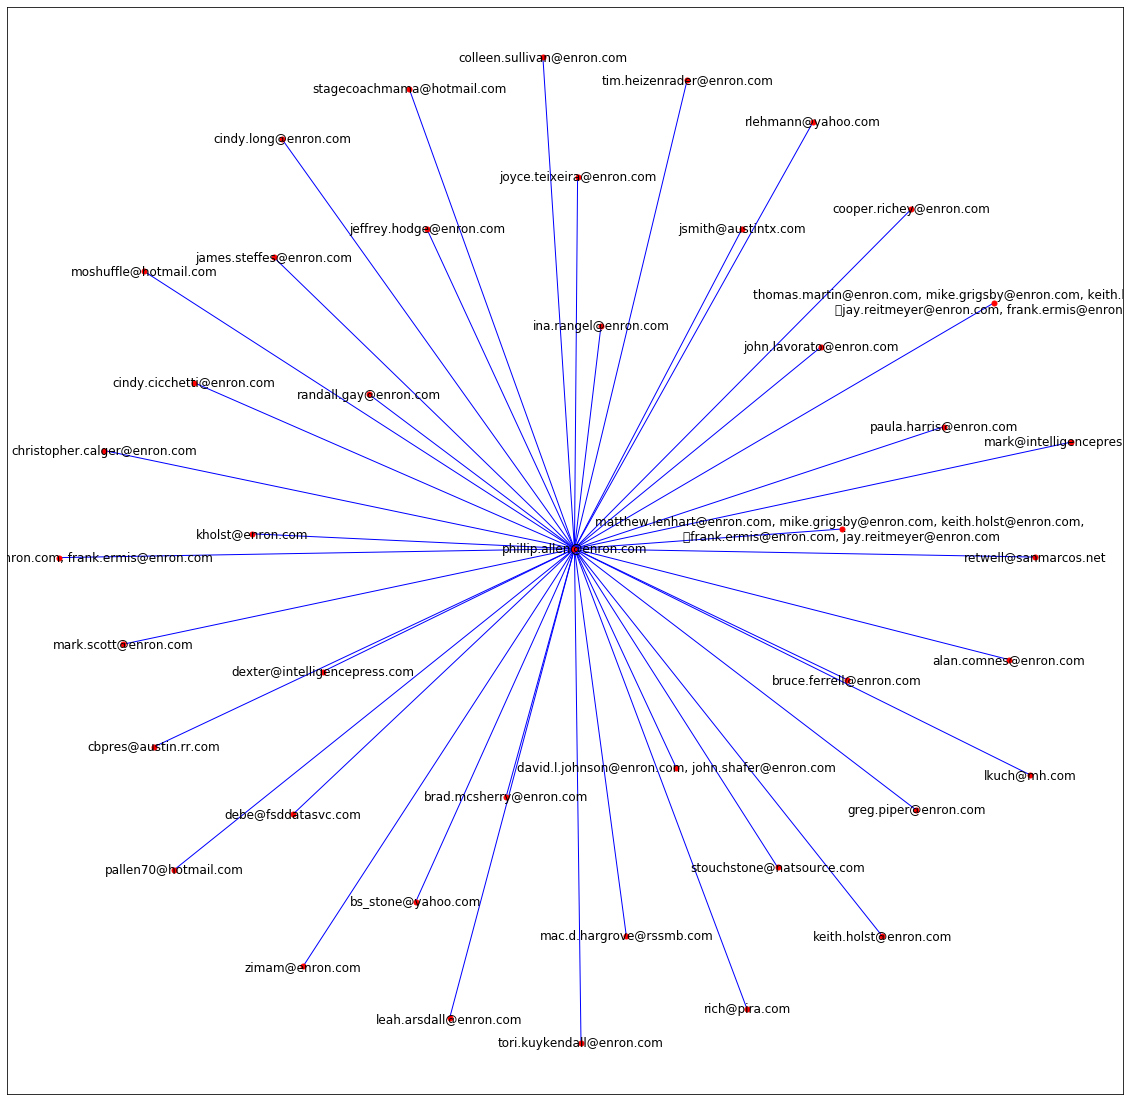

In [39]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(Gs, k=.1)
nx.draw_networkx(Gs, pos, node_size=25, node_color='red', with_labels=True, edge_color='blue')
plt.show()

In [41]:
mydict = nx.degree_centrality(Gs)
maximum = max(mydict, key=mydict.get)
print(maximum, mydict[maximum])

phillip.allen@enron.com 1.0


In [43]:
Gs = nx.Graph()
sample = emails_df.tail(100).sample(frac=.8)
for row in sample.iterrows():
        Gs.add_edge(row[1][4],row[1][5])

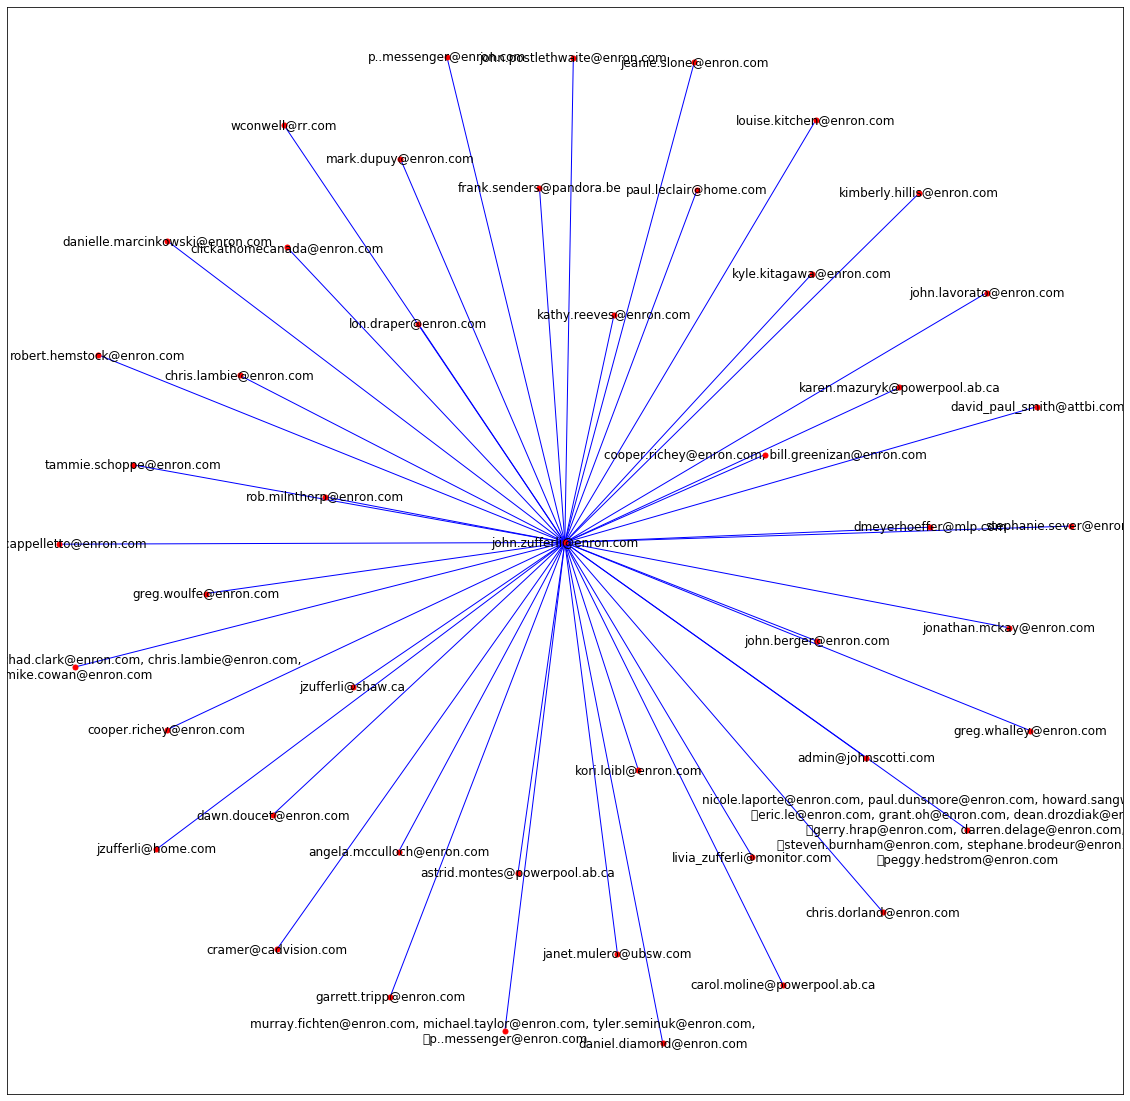

In [44]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(Gs, k=.1)
nx.draw_networkx(Gs, pos, node_size=25, node_color='red', with_labels=True, edge_color='blue')
plt.show()

In [45]:
mydict = nx.degree_centrality(Gs)
maximum = max(mydict, key=mydict.get)
print(maximum, mydict[maximum])

john.zufferli@enron.com 1.0
